# 5CS037 - Concepts and Technologies of AI Getting Started with Machine Learning Models.Implementation of k-Nearest Neighbor from Scratch.


## To - Do Exercise:

### <font  color='blue'> Problem - 1: Perform a classification task with knn from scratch.</font>

### 1.	Load the Dataset:

In [13]:
#Connecting to dirive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:

# Loading the Diabetes dataset
Diabetes = pd.read_csv("/content/drive/MyDrive/5CS037/Datasets/diabetes.csv")

# Checking the DataFrame's info
print(Diabetes.head())

# Checking data types of each column
print("\nData Types:\n", Diabetes.dtypes)

# Displaying summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:\n", Diabetes.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
O

### 2. Handle Missing Data:

In [28]:
#Checking if there are any missing values in each column
print("\nMissing Values:\n", Diabetes.isnull().sum())
# Check the column names in the Diabetes DataFrame
print(Diabetes.columns)


#There are no any missing values


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Category                0
dtype: int64
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_Category'],
      dtype='object')


### 3. Feature Engineering:

In [18]:
# Adding a new feature (e.g., BMI category based on BMI value)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

if 'BMI' in Diabetes.columns:
    Diabetes['BMI_Category'] = Diabetes['BMI'].apply(categorize_bmi)

# Displaying the first few rows to verify the new column
print("\nDataset with BMI_Category:\n", Diabetes.head())



Dataset with BMI_Category:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome BMI_Category  
0                     0.627   50        1        Obese  
1                     0.351   31        0   Overweight  
2                     0.672   32        1       Normal  
3                     0.167   21        0   Overweight  
4                     2.288   33        1        Obese  


### 5.	Implement KNN:
###•	Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
###•	Compute distances using Euclidean distance.
###•	Write functions for:
-Predicting the class for a single query.
-Predicting classes for all test samples.
###• Evaluate the performance using accuracy.


Data Visualization


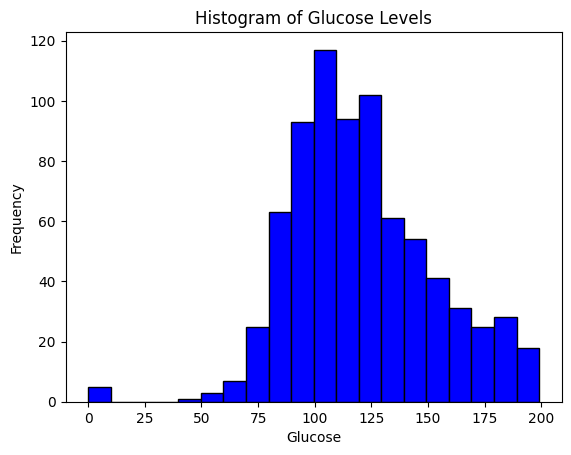

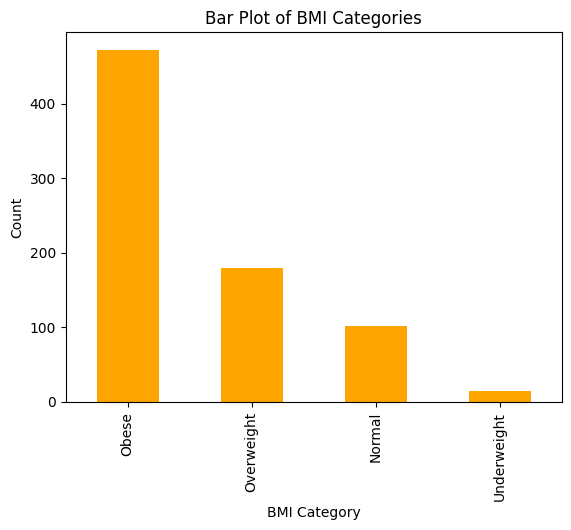

In [19]:

# Histogram of a numerical column (e.g., Glucose levels)
if 'Glucose' in Diabetes.columns:
    plt.hist(Diabetes['Glucose'], bins=20, color='blue', edgecolor='black')
    plt.title("Histogram of Glucose Levels")
    plt.xlabel("Glucose")
    plt.ylabel("Frequency")
    plt.show()

# Count plot for BMI_Category (if created)
if 'BMI_Category' in Diabetes.columns:
    Diabetes['BMI_Category'].value_counts().plot(kind='bar', color='orange')
    plt.title("Bar Plot of BMI Categories")
    plt.xlabel("BMI Category")
    plt.ylabel("Count")
    plt.show()


Splitting the Data into Training and Testing Sets

In [30]:
# Separating features (X) and target (y)
X = Diabetes.drop(columns=['Outcome', 'BMI_Category']).values  # Drop the 'Outcome' and 'BMI_Category' columns
y = Diabetes['Outcome'].values  # The 'Outcome' column is the target variable

# Train-test split function
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


Euclidean Distance Function

In [32]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Testing the Euclidean distance function
point1 = np.array([3, 4])
point2 = np.array([0, 0])
result = euclidean_distance(point1, point2)
print("Euclidean Distance:", result)


Euclidean Distance: 5.0


KNN Prediction for Single Query

In [33]:
# K-NN Prediction for a Single Query
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


KNN Prediction for All Test Samples

In [34]:
# K-NN Prediction for all Test Samples
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


Computing Accuracy

In [35]:
# Computing accuracy function
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Performing prediction on the entire test set
try:
    predictions = knn_predict(X_test, X_train, y_train, k=3)
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 67.39%


Experiment with Different Values of K

In [ ]:
# Experiment with different values of k
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = {}
    for k in k_values:
        predictions = knn_predict(X_test, X_train, y_train, k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
    return accuracies

# Example: Testing different k values
k_values = [1, 3, 5, 7]
accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
print("Accuracies for different k values:", accuracies)


### <font text color = 'blue'>Problem 2: Experimentation</font>

### 1. Repeat the Classification Task:
•	Scale the Feature matrix X.

•	Use the scaled data for training and testing the kNN Classifier.

•	Record the results.
### 2. Comparative Analysis: Compare the Results -
•	Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

•	Discuss:
  How scaling impacted the KNN performance.
  The reason for any observed changes in accuracy.


In [41]:

import time

# 1. Manual Scaling (Standardization)
def scale_features(X):
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    # Standardize the features (X - mean) / std
    return (X - mean) / std

# 2. kNN Algorithm from Scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, X_test, y_train, k):
    y_pred = []
    for x_test in X_test:
        # Calculate the distance between the test point and all training points
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        # Get the labels of the k nearest neighbors
        k_nearest_labels = y_train[k_indices]
        # Predict the most common label among the k neighbors
        y_pred.append(np.bincount(k_nearest_labels).argmax())
    return np.array(y_pred)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# 3. Train-test split (You already have this function from earlier)
# You can reuse the previous train_test_split_scratch function for splitting the dataset

# Separate features (X) and target (y)
X = Diabetes.drop(columns=['Outcome', 'BMI_Category']).values  # Exclude 'Outcome' and 'BMI_Category' from features
y = Diabetes['Outcome'].values  # Target is the 'Outcome' column

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# 4. Scale the features
X_train_scaled = scale_features(X_train)
X_test_scaled = scale_features(X_test)

# 5. Train and test on the original dataset (using k=3)
start_time = time.time()
y_pred_original = knn_predict(X_train, X_test, y_train, k=3)
end_time = time.time()
original_accuracy = accuracy(y_test, y_pred_original)
original_time = end_time - start_time

# 6. Train and test on the scaled dataset (using k=3)
start_time = time.time()
y_pred_scaled = knn_predict(X_train_scaled, X_test_scaled, y_train, k=3)
end_time = time.time()
scaled_accuracy = accuracy(y_test, y_pred_scaled)
scaled_time = end_time - start_time

# Output results
print(f"Accuracy on original dataset: {original_accuracy}")
print(f"Accuracy on scaled dataset: {scaled_accuracy}")
print(f"Time taken on original dataset: {original_time} seconds")
print(f"Time taken on scaled dataset: {scaled_time} seconds")


Accuracy on original dataset: 0.6739130434782609
Accuracy on scaled dataset: 0.7130434782608696
Time taken on original dataset: 1.4587576389312744 seconds
Time taken on scaled dataset: 0.8052816390991211 seconds


### <font text color = 'blue'>Problem 3: Experimentation with k:</font>

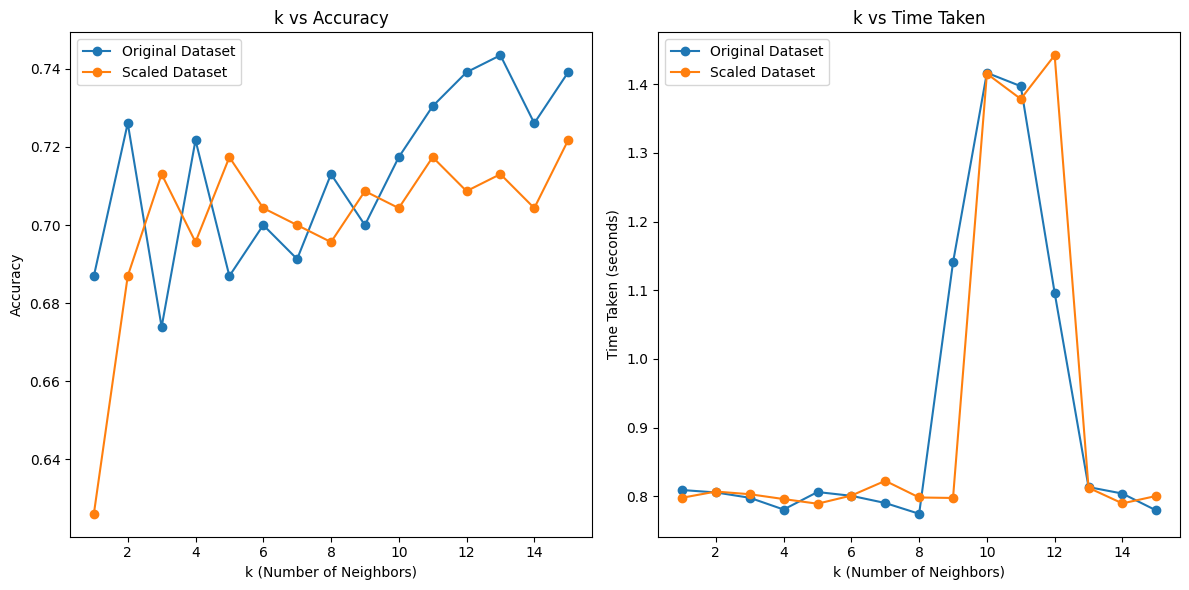

In [39]:
# Function to test kNN with different values of k
def knn_experiment(X_train, X_test, y_train, y_test, k_range):
    accuracies = []
    times = []

    for k in k_range:
        start_time = time.time()
        y_pred = knn_predict(X_train, X_test, y_train, k)
        end_time = time.time()

        accuracies.append(accuracy(y_test, y_pred))
        times.append(end_time - start_time)

    return accuracies, times

# Defining the range of k values
k_range = list(range(1, 16))

# Experimenting on the original dataset
original_accuracies, original_times = knn_experiment(X_train, X_test, y_train, y_test, k_range)

# Experimenting on the scaled dataset
scaled_accuracies, scaled_times = knn_experiment(X_train_scaled, X_test_scaled, y_train, y_test, k_range)

# Plotting k vs Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, original_accuracies, label='Original Dataset', marker='o')
plt.plot(k_range, scaled_accuracies, label='Scaled Dataset', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()

# Plotting k vs Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_range, original_times, label='Original Dataset', marker='o')
plt.plot(k_range, scaled_times, label='Scaled Dataset', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken')
plt.legend()

plt.tight_layout()
plt.show()


# <font text color = 'blue'>Problem 4 - Additional Questions {Optional - But Highly Recommended}:</font>

###•	Discuss the challenges of using KNN for large datasets and high-dimensional data.
###•	Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality reduction).


### Challenges of Using KNN for Large Datasets and High-Dimensional Data

**Challenges with Large Datasets:**

**Computation Time:** KNN is a lazy learning algorithm, meaning it doesn't learn a model but instead makes predictions by computing distances to all training data points. As the dataset grows, the time taken to calculate distances for each test point increases significantly. This results in high computational cost, especially for large datasets.

**Memory Usage:** KNN requires storing the entire training dataset in memory, which can be problematic with large datasets, as the memory requirements increase.

**Scalability: **As the dataset size grows, the performance of KNN can degrade, and the time complexity of finding the nearest neighbors becomes a bottleneck.
Challenges with High-Dimensional Data:

**Curse of Dimensionality:** As the number of features (dimensions) increases, the distance between data points becomes less meaningful. This is because in high-dimensional spaces, all points tend to become equidistant from each other, making it difficult to distinguish between the closest neighbors. The "curse of dimensionality" can significantly affect the performance of KNN.

**Distance Metrics:** In high-dimensional spaces, Euclidean distance (commonly used in KNN) might not be effective because it becomes harder to distinguish between nearby and far-away points.

**Computational Cost:** In high-dimensional data, the number of calculations required for each prediction increases, making the algorithm computationally expensive.
Strategies to Improve the Efficiency of KNN

### Strategies to Improve the Efficiency of KNN
**Approximate Nearest Neighbors (ANN):**

**Description: **Instead of computing exact distances to all points in the training dataset, ANN algorithms use approximations to speed up the process. Methods like Locality-Sensitive Hashing (LSH) or KD-trees can be used to quickly find approximate nearest neighbors.

**Benefit: **These methods significantly reduce the time complexity of KNN, making it more efficient, especially for large datasets.

**Dimensionality Reduction:**

**Principal Component Analysis (PCA):** PCA is a technique used to reduce the dimensionality of the dataset by projecting it onto a lower-dimensional space. This helps by removing redundant features, thus reducing the computational cost and mitigating the curse of dimensionality.

**t-SNE or UMAP:** These are other techniques for dimensionality reduction, though more complex, that can be used for high-dimensional data to improve performance in KNN.

**Feature Selection**: Another strategy is to perform feature selection to retain only the most relevant features, thus reducing the dimensionality and improving the performance of KNN.

### Efficient Data Structures:

**KD-Trees:** A KD-tree (k-dimensional tree) is a data structure that partitions the feature space to help with efficient neighbor search. It works well when the data is relatively low-dimensional (e.g., 2 to 20 dimensions) but may not be effective for very high-dimensional data.

**Ball Trees:** Similar to KD-trees, ball trees are a data structure that works well for higher-dimensional data and is used to speed up the nearest neighbor search.

**Weighted KNN:**

Instead of assigning equal weight to all neighbors, weighted KNN assigns higher weights to closer neighbors and lower weights to farther neighbors. This can reduce the reliance on distant neighbors and potentially improve accuracy and reduce computation time.

**Conclusion:**
While KNN is a simple and effective algorithm, it faces significant challenges when dealing with large datasets or high-dimensional data. To overcome these challenges, approximate nearest neighbor algorithms, dimensionality reduction techniques, and efficient data structures like KD-trees or Ball trees can be employed. Additionally, weighted KNN can help in improving both accuracy and efficiency.